In [1]:
#Importing the required libraries and dataset


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from scipy.spatial import distance

data=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Maching Learning & AI/Individual Assignment/jewelry_customers.csv')

data.head()

data.tail()

data.describe()





C:\Users\anuj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [2]:
#Validating if there is any missing data 

pd.isna(data).sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [3]:
#Scaling the features as values for each feature are distributed across wide range

scl=StandardScaler()
data1=scl.fit_transform(data)

In [4]:
pd.DataFrame(data1).describe()

,0,1,2,3
count,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02
mean,5.672031e-17,-2.638154e-17,-1.954432e-16,-4.058360e-16
std,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00
min,-1.742394e+00,-1.766355e+00,-1.947295e+00,-2.399206e+00
25%,-1.037472e+00,-1.139805e+00,-7.722011e-01,-1.018085e+00
50%,-8.211094e-04,-1.210579e-02,-5.276784e-01,4.747819e-01
75%,1.077295e+00,8.784513e-01,1.014725e+00,8.463867e-01
max,1.574888e+00,1.849048e+00,1.908103e+00,1.645835e+00



Number of clusters: 2 
Clustering: [1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1
 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0


Number of clusters: 8 
Clustering: [5 5 0 0 7 3 5 7 1 7 4 2 6 6 0 4 0 1 7 4 6 4 5 1 4 3 3 0 7 0 0 0 7 0 2 5 7
 0 2 6 0 7 3 5 0 3 4 3 2 5 7 2 3 1 0 7 2 7 1 1 1 7 7 5 0 5 7 3 3 0 0 6 1 7
 6 5 2 5 0 3 0 4 5 1 1 2 6 5 0 5 0 5 3 7 5 3 2 5 5 2 6 3 2 3 2 1 1 6 6 5 1
 2 5 2 6 6 5 6 3 7 2 7 1 1 2 4 5 7 5 0 2 0 6 5 3 7 4 3 0 2 7 5 0 3 0 3 5 4
 0 1 5 6 1 5 1 4 6 5 7 0 2 1 5 6 7 2 1 5 2 5 7 0 6 0 7 5 5 7 7 7 5 5 6 3 3
 1 2 0 0 5 2 7 5 0 0 7 3 6 1 1 7 2 5 2 5 2 0 7 3 0 7 7 1 1 0 1 6 3 6 7 5 5
 2 7 6 3 6 5 0 7 5 5 7 5 5 5 2 0 6 2 3 0 5 5 4 5 2 7 3 3 3 1 5 6 7 1 6 6 5
 5 4 0 5 7 5 1 6 3 5 6 7 0 1 7 6 5 7 1 5 5 7 2 6 4 6 1 7 6 4 7 1 3 5 6 2 5
 2 7 1 2 0 6 1 0 2 3 0 1 2 2 1 4 4 0 7 6 5 5 1 6 1 2 7 6 1 7 2 1 6 5 6 0 5
 2 6 1 7 3 3 6 7 3 7 4 5 5 0 7 7 6 6 4 2 4 5 6 3 1 0 7 3 5 1 1 0 7 2 5 4 6
 2 0 7 1 7 7 1 2 6 1 0 2 5 4 7 1 5 1 7 5 1 7 2 1 5 2 3 6 5 1 6 0 5 0 1 2 3
 6 5 2 0 5 3 2 4 3 6 2 1 5 7 2 1 6 5 5 7 4 2 1 2 0 0 6 5 1 0 6 5 1 0 7 3 2
 2 3 6 2 7 1 5 3 0 6 6 4 3 6 3 7 2 6 5 2 7 7 3 5 6 0 0 2 5 0 5 1

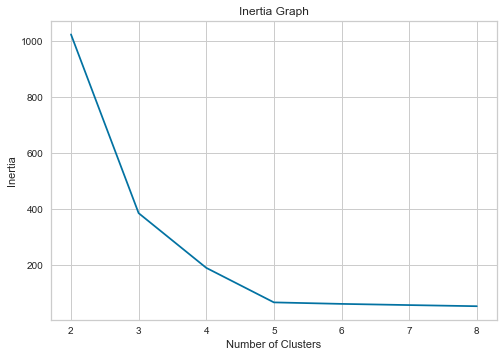

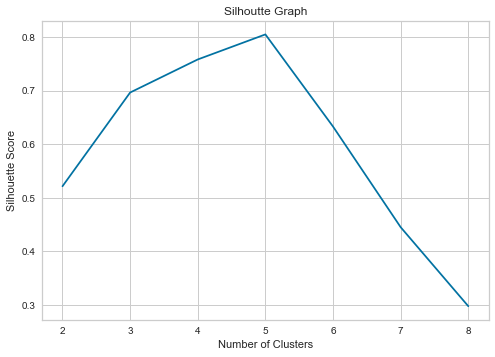

In [5]:
#Running the kmeans algorithm (k ranging from 2 to 9)
#Elbow method implementation 
#Generating Inertia and Silhouette score for each iteration 

cluster=[]
Inertia=[]
silscore=[]

x=data1

for k in range(2,9):
    kmeans=KMeans(n_clusters=k,n_init=25,random_state=40,max_iter=1000,init='k-means++')

    y_pred=kmeans.fit_predict(x)
    
    cluster.append(k)
    Inertia.append(kmeans.inertia_)
    
    silscore.append(silhouette_score(x,kmeans.labels_))

    
    print("\n"'Number of clusters:',k,"\n"'Clustering:',y_pred,"\n"'Inertia with',k,'Clusters:',kmeans.inertia_,"\n"
          'Silhouette_score with',k,'Clusters:',silhouette_score(x,kmeans.labels_),"\n"'Centroids:',kmeans.cluster_centers_) 
    
   



plt.plot(cluster,Inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia Graph')
plt.show()

plt.plot(cluster,silscore)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhoutte Graph')
plt.show()






Text(0, 0.5, 'SpendingScore')

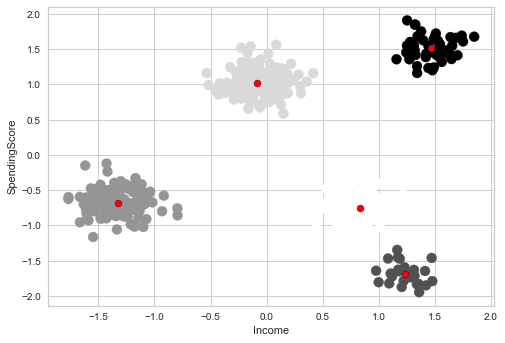

In [18]:
#Elbow method indicates that inertia starts increasing rapidly after k=5
#Highest Silhouette score is observed for k =5 
#Generating the clusters for k =5
#Plotting the clusters using two features 'Income' and 'Spending Score'

kmeans=KMeans(n_clusters=5,n_init=25,random_state=40,init='k-means++')

y_pred=kmeans.fit(x)

plt.figure;

plt.scatter(x[:,1], x[:,2], s=100, c=y_pred.labels_)

plt.scatter(
y_pred.cluster_centers_[:, 1], y_pred.cluster_centers_[:, 2],
c='red', edgecolor='black',
label='centroids'
)

plt.xlabel('Income')
plt.ylabel('SpendingScore')


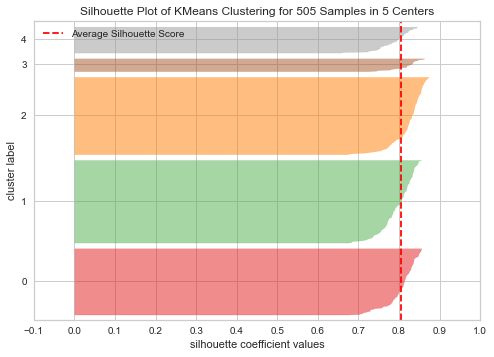

In [19]:
#Silhouette Score Map for each element of every cluster

visualizer=SilhouetteVisualizer(kmeans)
visualizer.fit(x)
visualizer.poof()

fig=visualizer.ax.get_figure()



In [20]:
#Publishing the cluster centers
kmeans.cluster_centers_

array([[-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636]])

In [21]:
#Publishing number of customers in each cluster

z_pred=kmeans.fit_predict(x)

data3=pd.DataFrame(data1)


data3['cluster']=z_pred

data3['cluster'].value_counts()



1    157
2    147
0    126
4     50
3     25
Name: cluster, dtype: int64

In [22]:
#Summary cluster statistics 

for label in set(kmeans.labels_):
    print('\nCluster{}:'.format(label))
    
    print(data[kmeans.labels_==label].describe())
    
    
    


Cluster0:
              Age         Income  SpendingScore       Savings
count  126.000000     126.000000     126.000000    126.000000
mean    32.777778  105265.809524       0.309926  14962.778066
std      3.792390    6080.621753       0.045513   1061.734017
min     22.000000   89598.000000       0.174120  12207.526078
25%     30.000000  100760.250000       0.281237  14223.787562
50%     33.000000  106002.500000       0.309479  14976.943192
75%     35.000000  108858.750000       0.341096  15682.288845
max     44.000000  119877.000000       0.411112  17968.553929

Cluster1:
              Age        Income  SpendingScore       Savings
count  157.000000    157.000000     157.000000    157.000000
mean    59.955414  72448.063694       0.771518   6889.972190
std      3.376662   6240.260008       0.046058   1052.276354
min     51.000000  56321.000000       0.657314   4077.658657
25%     58.000000  68463.000000       0.740367   6225.376082
50%     59.000000  72027.000000       0.766720   6845.

In [23]:
#Generating the details of Cluster representative (Personna)


for i, label in enumerate(set(kmeans.labels_)):    
    data_tmp = data[kmeans.labels_==label].copy()
    
    exemplar_idx = distance.cdist([kmeans.cluster_centers_[i]], data_tmp).argmin()
    exemplar = pd.DataFrame(data_tmp.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    
    
    print(exemplar)
    
    

    


Cluster 0:
                        339
Age               34.000000
Income         89598.000000
SpendingScore      0.340152
Savings        12832.768721

Cluster 1:
                        278
Age               59.000000
Income         56321.000000
SpendingScore      0.806566
Savings         6129.288986

Cluster 2:
                        320
Age               87.000000
Income         12000.000000
SpendingScore      0.342991
Savings        16180.265252

Cluster 3:
                         368
Age                84.000000
Income         110582.000000
SpendingScore       0.079049
Savings         14937.995170

Cluster 4:
                         360
Age                28.000000
Income         117108.000000
SpendingScore       0.857078
Savings          4749.879237
